## Значения, полученные экспериментально

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Калибровка

In [159]:
df_calibration = pd.DataFrame()
df_calibration["I"] = np.array([0, 10, 30, 50, 70, 100, 120, 150, 160, 180, 200, 230, 250, 270, 300, 330, 370])     # mA
df_calibration["B"] = np.array([12.28, 18.55, 43.6, 69.5, 89.1, 126.5, 154.6, 191.8, 204, 223, 248, 280, 301, 314, 332, 344, 358])  #mT

df_calibration["sigmaI"] = np.array([5 for i in range(len(df_calibration["I"]))])
df_calibration["sigmaB"] = np.array([1 for i in range(len(df_calibration["B"]))])
print(df_calibration)

print("Len 1 = %d, len 2 = %d" %(len(df_calibration["I"]), len(df_calibration["B"])))

      I       B  sigmaI  sigmaB
0     0   12.28       5       1
1    10   18.55       5       1
2    30   43.60       5       1
3    50   69.50       5       1
4    70   89.10       5       1
5   100  126.50       5       1
6   120  154.60       5       1
7   150  191.80       5       1
8   160  204.00       5       1
9   180  223.00       5       1
10  200  248.00       5       1
11  230  280.00       5       1
12  250  301.00       5       1
13  270  314.00       5       1
14  300  332.00       5       1
15  330  344.00       5       1
16  370  358.00       5       1
Len 1 = 17, len 2 = 17


### Диск Корбино

In [160]:
df_corbino = pd.DataFrame()
df_corbino["I"] = np.array([0, 10, 20, 40, 70, 90, 100, 130, 150, 160, 200, 230, 250, 280, 310, 350, 360])
df_corbino["U"] = np.array([780, 793, 814, 896, 1030, 1162, 1225, 1493, 1720, 1877, 2313, 2642, 2848, 3128, 3317, 3524, 3556])      # delta U in mkV

df_corbino["sigmaI"] = np.array([1 for i in range(len(df_corbino["I"]))])
df_corbino["sigmaU"] = np.array([1 for i in range(len(df_corbino["U"]))])
print(df_corbino)

print("Len 1 = %d, len 2 = %d" %(len(df_corbino["I"]), len(df_corbino["U"])))

      I     U  sigmaI  sigmaU
0     0   780       1       1
1    10   793       1       1
2    20   814       1       1
3    40   896       1       1
4    70  1030       1       1
5    90  1162       1       1
6   100  1225       1       1
7   130  1493       1       1
8   150  1720       1       1
9   160  1877       1       1
10  200  2313       1       1
11  230  2642       1       1
12  250  2848       1       1
13  280  3128       1       1
14  310  3317       1       1
15  350  3524       1       1
16  360  3556       1       1
Len 1 = 17, len 2 = 17


### Пластина поперек

In [161]:
df_plate1 = pd.DataFrame()
df_plate1["I"] = np.array([0, 20, 50, 70, 80, 100, 110, 130, 140, 170, 190, 210, 230, 260, 300, 330, 360])
df_plate1["U"] = np.array([690, 696, 740, 760, 790, 837, 873, 907, 994, 1018, 1080, 1135, 1168, 1240, 1303, 1340, 1366])

df_plate1["sigmaI"] = np.array([1 for i in range(len(df_plate1["I"]))])
df_plate1["sigmaU"] = np.array([1 for i in range(len(df_plate1["U"]))])
print(df_plate1)

print("Len 1 = %d, len 2 = %d" %(len(df_plate1["I"]), len(df_plate1["U"])))

      I     U  sigmaI  sigmaU
0     0   690       1       1
1    20   696       1       1
2    50   740       1       1
3    70   760       1       1
4    80   790       1       1
5   100   837       1       1
6   110   873       1       1
7   130   907       1       1
8   140   994       1       1
9   170  1018       1       1
10  190  1080       1       1
11  210  1135       1       1
12  230  1168       1       1
13  260  1240       1       1
14  300  1303       1       1
15  330  1340       1       1
16  360  1366       1       1
Len 1 = 17, len 2 = 17


### Пластина продольно


In [162]:
df_plate2 = pd.DataFrame()
df_plate2["I"] = np.array([0, 10, 30, 50, 80, 90, 110, 140, 160, 180, 200, 230, 240, 250, 270, 290, 320, 350])
df_plate2["U"] = np.array([685, 690, 721, 733, 762, 773, 786, 820, 842, 870, 892, 920, 932, 942, 963, 975, 993, 1010])

df_plate2["sigmaI"] = np.array([1 for i in range(len(df_plate2["I"]))])
df_plate2["sigmaU"] = np.array([1 for i in range(len(df_plate2["U"]))])
print(df_plate2)

print("Len 1 = %d, len 2 = %d" %(len(df_plate2["I"]), len(df_plate2["U"])))

      I     U  sigmaI  sigmaU
0     0   685       1       1
1    10   690       1       1
2    30   721       1       1
3    50   733       1       1
4    80   762       1       1
5    90   773       1       1
6   110   786       1       1
7   140   820       1       1
8   160   842       1       1
9   180   870       1       1
10  200   892       1       1
11  230   920       1       1
12  240   932       1       1
13  250   942       1       1
14  270   963       1       1
15  290   975       1       1
16  320   993       1       1
17  350  1010       1       1
Len 1 = 18, len 2 = 18


## Рассчеты

### Нарисуем график калибровки

<ErrorbarContainer object of 3 artists>

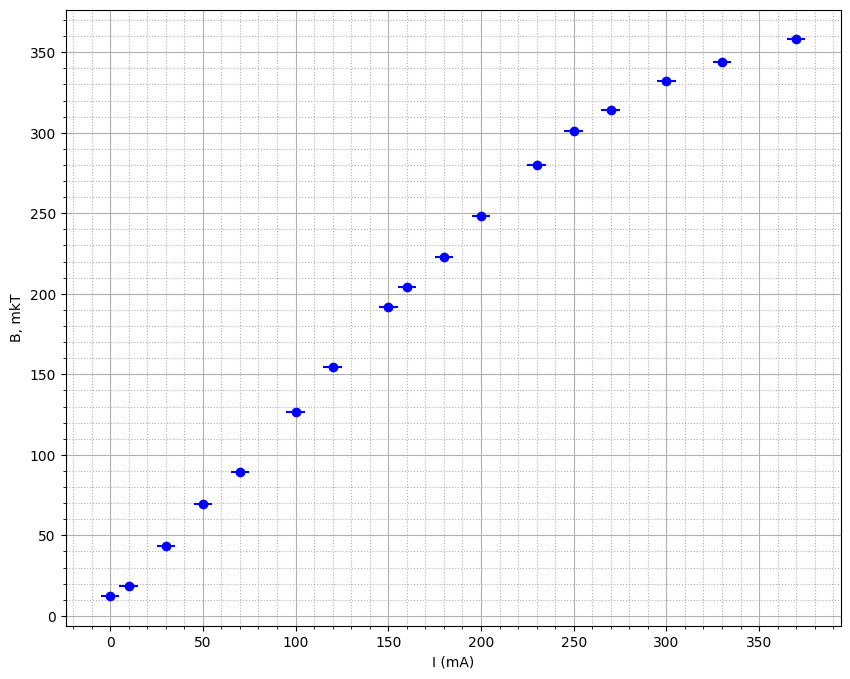

In [163]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.set_ylabel("B, mkT")
ax.set_xlabel("I (mA)")

# df_calibration["B old"] = df_calibration["B"]
# df_calibration["I old"] = df_calibration["I"]
ax.errorbar(df_calibration["I"], df_calibration["B"], xerr=df_calibration["sigmaI"], yerr=df_calibration["sigmaB"], fmt='o', color='blue')
# Выделим линейную часть
# df_calibration["B"] = df_calibration["B"][:-3]
# df_calibration["I"] = df_calibration["I"][:-3]
# ax.errorbar(df_calibration["I"], df_calibration["B"], xerr=df_calibration["sigmaI"], yerr=df_calibration["sigmaB"], fmt='o', color='red')

### Рассчитаем B для соответствующих измерениям токов

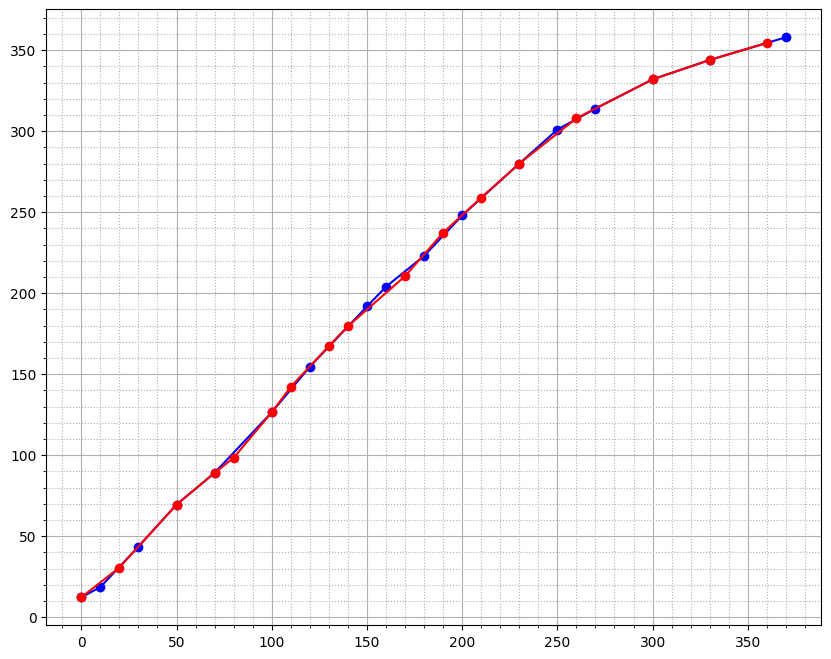

In [164]:
def b_by_i(df):
    df["B"] = np.array([0 for i in range(len(df["I"]))])
    for i in range(len(df["I"])):
        for j in range(len(df_calibration["I"]) - 1):
            if (df_calibration["I"][j] >= df["I"][i] or j == len(df_calibration) - 2):
                k = (df_calibration["B"][j+1] - df_calibration["B"][j]) / (df_calibration["I"][j+1] - df_calibration["I"][j])
                df["B"][i] = df_calibration["B"][j] + k * (df["I"][i] - df_calibration["I"][j])
                break


b_by_i(df_corbino)
b_by_i(df_plate1)
b_by_i(df_plate2)


# print('corbino\n', df_corbino)
# print('plate 1\n', df_plate1)
# print('plate 2\n', df_plate2)

# Check results
# ---------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize = (10, 8))
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.plot(df_calibration["I"], df_calibration["B"], '-o', color='blue')
ax.plot(df_plate1["I"], df_plate1["B"], '-o', color='red')
# ---------------------------------------------------------------------------------

### Рассчитаем R

In [165]:
df_corbino["R"] = np.array(df_corbino["U"] / (25.5 * 0.001))
df_plate1["R"] = np.array(df_plate1["U"] / (10 * 0.001))
df_plate2["R"] = np.array(df_plate2["U"] / (10 * 0.001))

df_corbino["B2"] = df_corbino["B"] ** 2
df_plate1["B2"] = df_plate1["B"] ** 2
df_plate2["B2"] = df_plate2["B"] ** 2

### Построим график R(B^2)

k corbino = 0.8617396968357409 (blue)
k plate1 = 0.5261736932235457 (red)
k plate2 = 0.24238847954082482 (green)


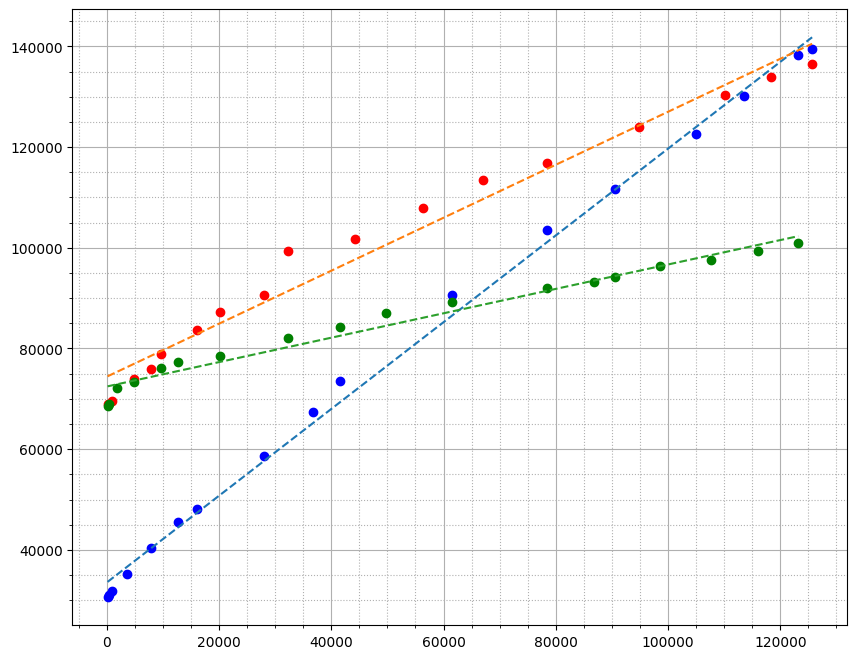

In [166]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.plot(df_corbino["B2"], df_corbino["R"], 'o', color='blue')
p = np.polyfit(df_corbino["B2"], df_corbino["R"], 1)
ya = np.polyval(p, df_corbino["B2"])
ax.plot(df_corbino["B2"], ya, linestyle='dashed')
df_corbino["m2"] = (ya[1] - ya[0]) / (df_corbino["B2"][1] - df_corbino["B2"][0])
print("k corbino =", df_corbino["m2"][0], '(blue)')

ax.plot(df_plate1["B2"], df_plate1["R"], 'o', color='red')
p = np.polyfit(df_plate1["B2"], df_plate1["R"], 1)
ya = np.polyval(p, df_plate1["B2"])
ax.plot(df_plate1["B2"], ya, linestyle='dashed')
df_plate1["m2"] = (ya[1] - ya[0]) / (df_plate1["B2"][1] - df_plate1["B2"][0])
print("k plate1 =", df_plate1["m2"][0], '(red)')

ax.plot(df_plate2["B2"], df_plate2["R"], 'o', color='green')
p = np.polyfit(df_plate2["B2"], df_plate2["R"], 1)
ya = np.polyval(p, df_plate2["B2"])
ax.plot(df_plate2["B2"], ya, linestyle='dashed')
df_plate2["m2"] = (ya[1] - ya[0]) / (df_plate2["B2"][1] - df_plate2["B2"][0])
print("k plate2 =", df_plate2["m2"][0], '(green)')
